# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" +weather_api_key + units + "&q=" +city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fort mcmurray
Processing Record 2 of Set 1 | vilyuchinsk
Processing Record 3 of Set 1 | tiksi
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | qulsary
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | la passe
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | zhangatas
Processing Record 12 of Set 1 | al wajh
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | kapuskasing
Processing Record 16 of Set 1 | touros
Processing Record 17 of Set 1 | bardai
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | yuzhno-kurilsk
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | st. john's
Processing Record 22 of Set 1 | ilu

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fort mcmurray,56.7268,-111.3810,9.77,76,100,1.54,CA,1717948964
1,vilyuchinsk,52.9306,158.4028,12.15,89,99,3.77,RU,1717948741
2,tiksi,71.6872,128.8694,0.10,95,96,2.43,RU,1717948966
3,edinburgh of the seven seas,-37.0676,-12.3116,14.33,85,100,8.57,SH,1717948968
4,qulsary,46.9531,54.0198,30.48,30,17,3.90,KZ,1717948969


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort mcmurray,56.7268,-111.3810,9.77,76,100,1.54,CA,1717948964
1,vilyuchinsk,52.9306,158.4028,12.15,89,99,3.77,RU,1717948741
2,tiksi,71.6872,128.8694,0.10,95,96,2.43,RU,1717948966
3,edinburgh of the seven seas,-37.0676,-12.3116,14.33,85,100,8.57,SH,1717948968
4,qulsary,46.9531,54.0198,30.48,30,17,3.90,KZ,1717948969


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

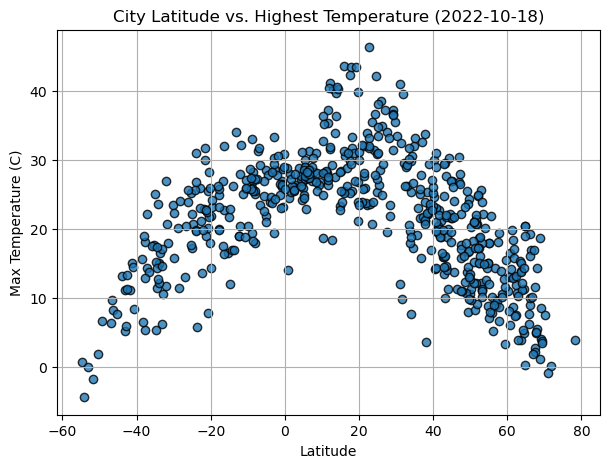

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
Latitudes = city_data_df['Lat']
Highest_Temperatures = city_data_df['Max Temp']
# Incorporate the other graph properties
# YOUR CODE HERE
plt.figure(figsize=(7,5))
plt.scatter(Latitudes,Highest_Temperatures, edgecolors='black', linewidths = 1, alpha =0.80)

plt.title('City Latitude vs. Highest Temperature (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

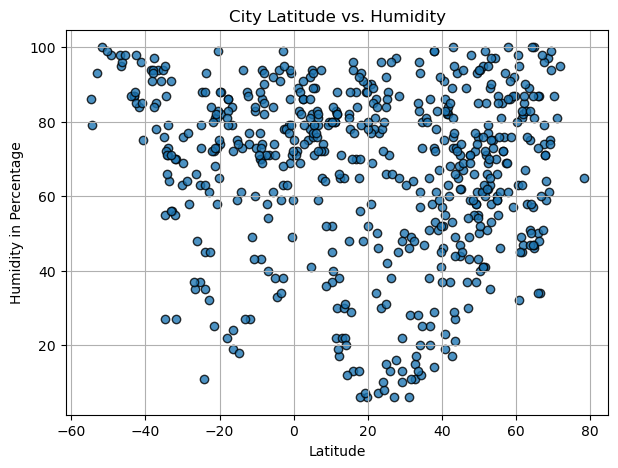

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HER
Latitudes = city_data_df['Lat']
Humidity = city_data_df['Humidity']
# Incorporate the other graph properties
# YOUR CODE HERE
plt.figure(figsize=(7,5))
plt.scatter(Latitudes,Humidity, edgecolors='black', linewidths = 1, alpha =0.80)

plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity in Percentage')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

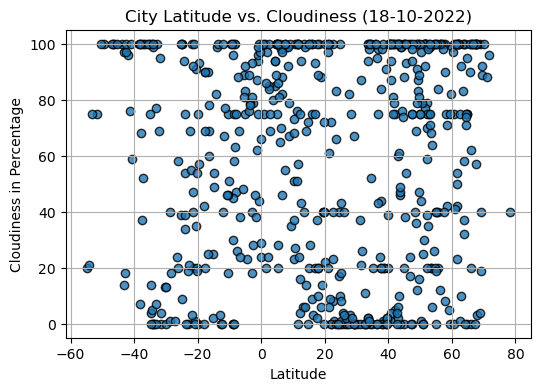

In [11]:
# Build the scatter plots for latitude vs. humidity
Latitudes = city_data_df['Lat']
Cloudiness = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.figure(figsize=(6,4))
plt.scatter(Latitudes,Cloudiness, edgecolors='black', linewidths = 1, alpha =0.80)

plt.title('City Latitude vs. Cloudiness (18-10-2022)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness in Percentage')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")
 
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

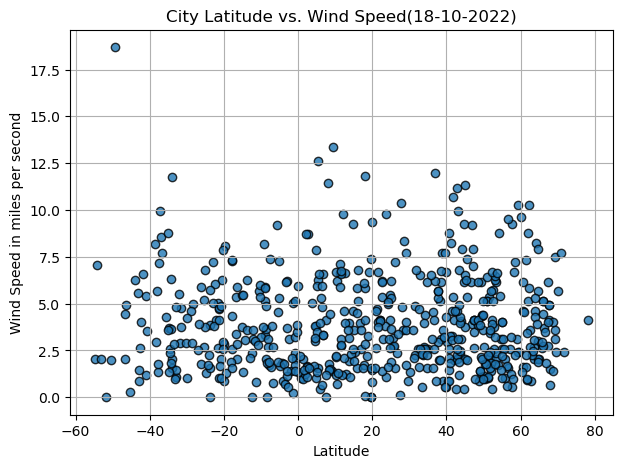

In [12]:
# Build the scatter plots for latitude vs. wind speed
Latitudes = city_data_df['Lat']
Wind_Speed = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.figure(figsize=(7,5))
plt.scatter(Latitudes,Wind_Speed, edgecolors='black', linewidths = 1, alpha =0.80)

plt.title('City Latitude vs. Wind Speed(18-10-2022)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed in miles per second')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")
 
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, x_label, y_label):
    slope, intercept, r_value, p_value, std_error = linregress(x_axis, y_axis)

    regression_line = slope * x_axis + intercept

    line_eq = "y=" + str(round(slope,2)) + "x+" + str (round(intercept,2))

    # Plot scatter plot
    plt.figure(figsize=(7,5))
    plt.scatter(x_axis,y_axis, color='blue', alpha=0.65)
    
    # Plot regression line 
   
    plt.plot(x_axis, regression_line,"r-")
    plt.annotate(line_eq, (x_axis.min(), y_axis.min()), fontsize = 11, color = "red")
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    print(f"The r-value is:{r_value}")

    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fort mcmurray,56.7268,-111.3810,9.77,76,100,1.54,CA,1717948964
1,vilyuchinsk,52.9306,158.4028,12.15,89,99,3.77,RU,1717948741
2,tiksi,71.6872,128.8694,0.10,95,96,2.43,RU,1717948966
4,qulsary,46.9531,54.0198,30.48,30,17,3.90,KZ,1717948969
7,la passe,45.5549,-0.8967,24.13,67,93,7.39,FR,1717948971


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,edinburgh of the seven seas,-37.0676,-12.3116,14.33,85,100,8.57,SH,1717948968
5,bredasdorp,-34.5322,20.0403,11.52,87,4,2.60,ZA,1717948970
6,margaret river,-33.9500,115.0667,15.00,71,100,11.78,AU,1717948970
12,adamstown,-25.0660,-130.1015,22.19,73,9,6.79,PN,1717948979
13,puerto natales,-51.7236,-72.4875,-1.75,100,75,0.00,CL,1717948870


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.737677943066713


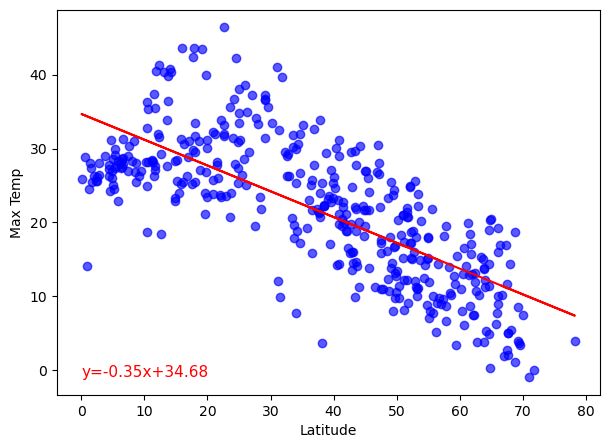

In [16]:
# Linear regression on Northern Hemisphere

x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

plot_linear_regression(x_axis, y_axis, 'Latitude', 'Max Temp')

The r-value is:0.770331065037266


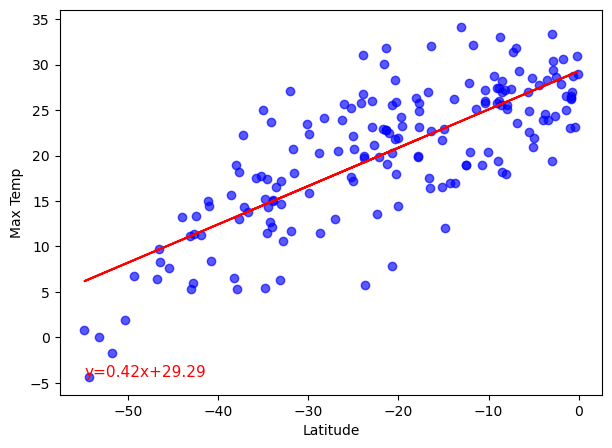

In [17]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

plot_linear_regression(x_axis, y_axis, 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** From the above two graphs we can see that in the southern hemisphere there is a positive corelation which is 0.80 which means that as we move from south pole towards the equater the temprature tends to decrease and the vice versa is true for northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.06857594124283913


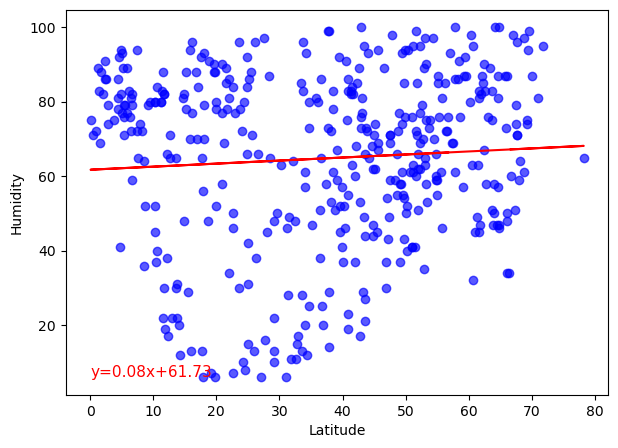

In [18]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

plot_linear_regression(x_axis, y_axis, 'Latitude', 'Humidity')

The r-value is:-0.23691237136226453


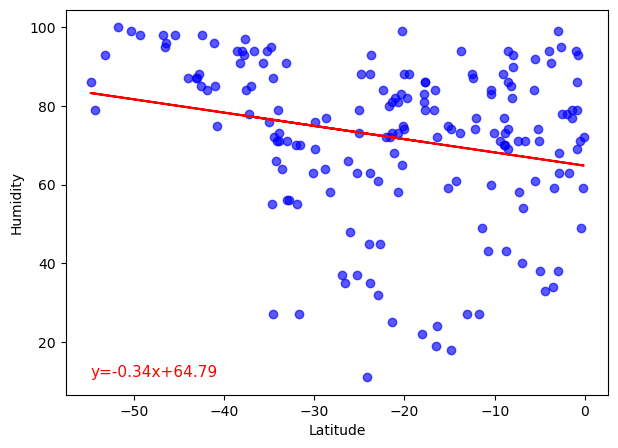

In [19]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

plot_linear_regression(x_axis, y_axis, 'Latitude', 'Humidity')

**Discussion about the linear relationship:** It can be concluded from the above 2 graphs that there is almost no relation between the latitude and humidity level.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.05990390255103712


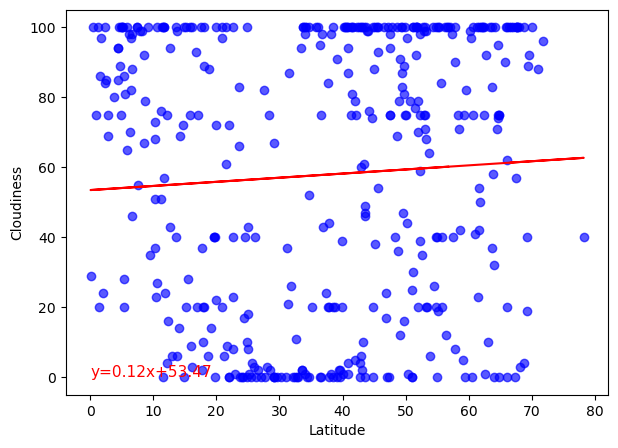

In [20]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

plot_linear_regression(x_axis, y_axis, 'Latitude', 'Cloudiness')

The r-value is:-0.013125950153320147


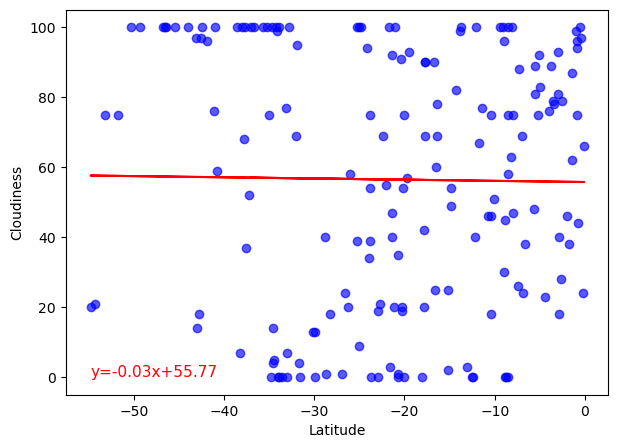

In [21]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

plot_linear_regression(x_axis, y_axis, 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** There is no much corelation between the latitude and cloudiness as well.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:-0.0023742679922766343


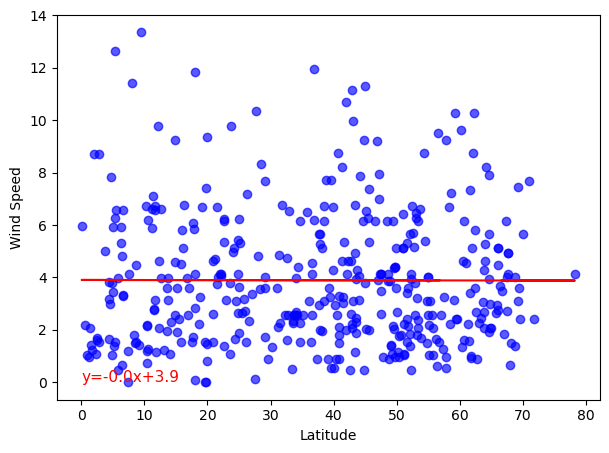

In [22]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

plot_linear_regression(x_axis, y_axis, 'Latitude', 'Wind Speed')

The r-value is:-0.16146726896302313


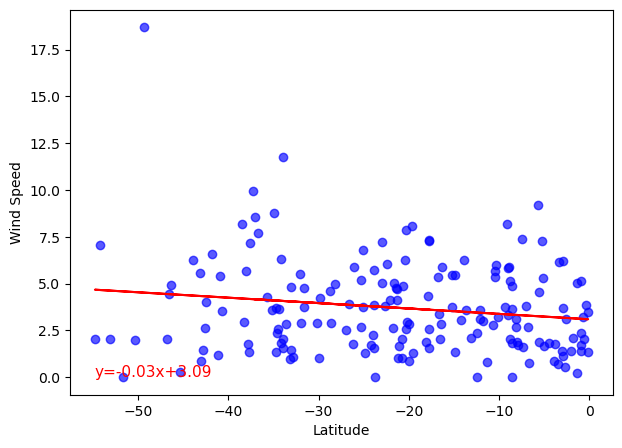

In [23]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

plot_linear_regression(x_axis, y_axis, 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** It can be concluded that it is almost impossible to predict wind speed on the basis on Latitude.